In [19]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from statsmodels.formula.api import OLS
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.graphics.tsaplots import plot_acf
from scipy.stats import levene
from statsmodels.stats.diagnostic import het_breuschpagan
pd.options.mode.chained_assignment = None

In [2]:
df = pd.read_csv('C:\\Users\\tilleymusprime\\Desktop\\mcclean1.csv')
qb=df[df['Position'] == 'QB']

In [3]:
##In this workbook, we will be working with the Quarterback Position
qbcorr = qb.corr()
qbpos = qbcorr[qbcorr['Overall Rating'] >= 0.5]
qbneg = qbcorr[qbcorr['Overall Rating'] <= -0.5]
print(qbpos['Overall Rating'], qbneg['Overall Rating'])
#Here are the significant correlations for the wide receiver position

Awareness               0.877790
Overall Rating          1.000000
Play Action             0.751264
Stamina                 0.543206
Throw Accuracy Deep     0.738696
Throw Accuracy Mid      0.807725
Throw Accuracy Short    0.778388
Throw on the Run        0.658076
Toughness               0.544370
Name: Overall Rating, dtype: float64 Series([], Name: Overall Rating, dtype: float64)


In [5]:
qbsig = qb[['Awareness', 'Play Action', 'Stamina', 'Throw Accuracy Deep', 'Throw Accuracy Mid', 'Throw Accuracy Short', 
           'Throw on the Run', 'Toughness']]
X = add_constant(qbsig)
pd.Series([variance_inflation_factor(X.values, i)
          for i in range(X.shape[1])],
         index=X.columns)
#It looks like all of our vif scores are below 5 so we can move on to statistical summary testing

const                   1100.726303
Awareness                  2.773802
Play Action                3.021171
Stamina                    1.794269
Throw Accuracy Deep        3.261559
Throw Accuracy Mid         5.019426
Throw Accuracy Short       4.107700
Throw on the Run           1.731019
Toughness                  1.833983
dtype: float64

In [7]:
QB = sm.OLS(qb['Overall Rating'], qbsig).fit()
print(QB.summary())
#It doesn't look like toughness is significant so we will remove it

                            OLS Regression Results                            
Dep. Variable:         Overall Rating   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 1.102e+04
Date:                Sat, 21 Jul 2018   Prob (F-statistic):          3.93e-215
Time:                        10:41:39   Log-Likelihood:                -423.60
No. Observations:                 168   AIC:                             863.2
Df Residuals:                     160   BIC:                             888.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Awareness                0.3767 

In [15]:
qbsig1 = qb[['Awareness', 'Play Action', 'Stamina', 'Throw Accuracy Deep', 'Throw Accuracy Mid', 'Throw Accuracy Short', 
           'Throw on the Run']]
QB1 = sm.OLS(qb['Overall Rating'], qbsig1).fit()
print(QB1.summary())
#It looks like Throw Accuracy Short is not a significant variable so we will remove it
#Removing tougness improved the skewness of the data and raised the durbin watson statistic closer to 2

                            OLS Regression Results                            
Dep. Variable:         Overall Rating   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 1.265e+04
Date:                Sat, 21 Jul 2018   Prob (F-statistic):          3.90e-217
Time:                        11:03:43   Log-Likelihood:                -423.76
No. Observations:                 168   AIC:                             861.5
Df Residuals:                     161   BIC:                             883.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Awareness                0.3798 

In [ ]:
qbsig1 = qb[['Awareness', 'Play Action', 'Stamina', 'Throw Accuracy Deep', 'Throw Accuracy Mid',  
           'Throw on the Run']]
QB1 = sm.OLS(qb['Overall Rating'], qbsig1).fit()
print(QB1.summary())
#It looks like Throw Accuracy Short is not a significant variable so we will remove it
#Removing tougness improved the skewness of the data and raised the durbin watson statistic closer to 2

In [16]:
qbsig2 = qb[['Awareness', 'Play Action', 'Stamina', 'Throw Accuracy Mid', 
           'Throw on the Run']]
QB2 = sm.OLS(qb['Overall Rating'], qbsig2).fit()
print(QB2.summary())
#It looks like Throw Accuracy deep is not a significant variable so we will remove it

                            OLS Regression Results                            
Dep. Variable:         Overall Rating   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 1.780e+04
Date:                Sat, 21 Jul 2018   Prob (F-statistic):          3.99e-221
Time:                        11:04:36   Log-Likelihood:                -424.38
No. Observations:                 168   AIC:                             858.8
Df Residuals:                     163   BIC:                             874.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Awareness              0.3741      0

In [31]:
def model():
    pv=0.3741*qb['Awareness']+ 0.0912*qb['Play Action'] -0.1413*qb['Stamina']+ 0.2828*qb['Throw Accuracy Mid'] + 0.3891*qb['Throw on the Run']
    return pv

In [32]:
qb['Predicted Value'] = model()
qb['Residual'] = qb['Predicted Value'] - qb['Overall Rating']

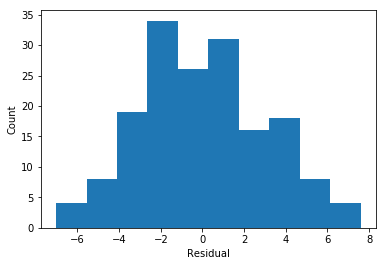

In [33]:
plt.hist(qb['Residual'])
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

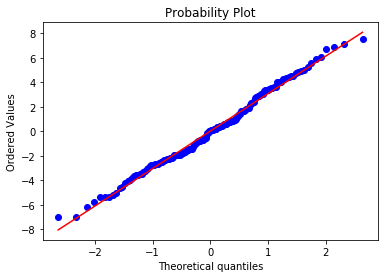

In [34]:
stats.probplot(qb['Residual'], plot=plt)
plt.show()
#The residuals appear to follow the normal distribution

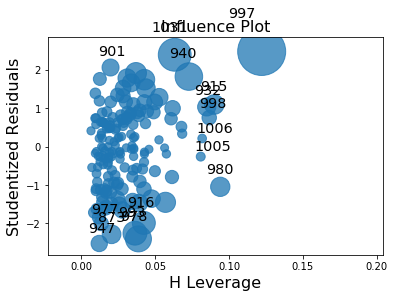

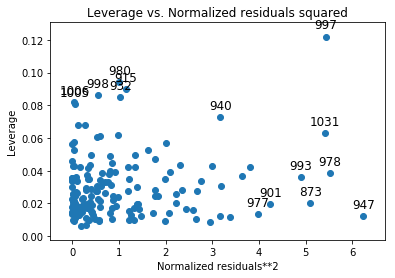

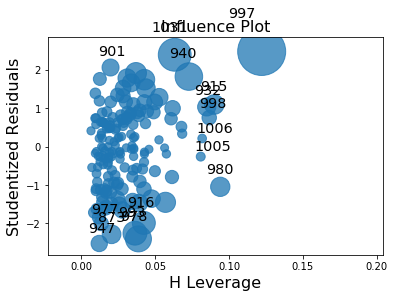

In [35]:
from statsmodels.graphics.regressionplots import *
plot_leverage_resid2(QB2)
influence_plot(QB2)
#It looks like we will need to remove points 997 and 1031

In [36]:
qbul = qb.drop(df.index[[997, 1031]])
qbulsig = qbul[['Awareness', 'Play Action', 'Stamina', 'Throw Accuracy Mid', 
           'Throw on the Run']]
QB3 = sm.OLS(qbul['Overall Rating'], qbulsig).fit()
print(QB3.summary())
#It looks like removing the leverage points caused a reduction in the AIC

                            OLS Regression Results                            
Dep. Variable:         Overall Rating   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 1.851e+04
Date:                Sat, 21 Jul 2018   Prob (F-statistic):          3.51e-220
Time:                        11:14:45   Log-Likelihood:                -414.62
No. Observations:                 166   AIC:                             839.2
Df Residuals:                     161   BIC:                             854.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Awareness              0.3681      0

In [39]:
def model():
    pv=0.3681*qb['Awareness']+ 0.0876*qb['Play Action'] -0.1561*qb['Stamina']+ 0.2824*qb['Throw Accuracy Mid'] + 0.4140*qb['Throw on the Run']
    return pv

In [40]:
qbul['Predicted Value'] = model()
qbul['Residual'] = qbul['Predicted Value'] - qbul['Overall Rating']

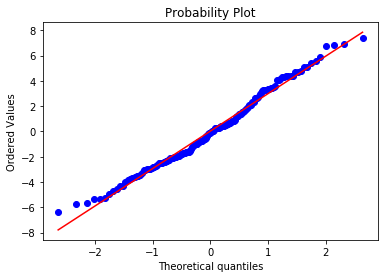

In [41]:
stats.probplot(qbul['Residual'], plot=plt)
plt.show()
#There does not appear to be any outliers in the residuals

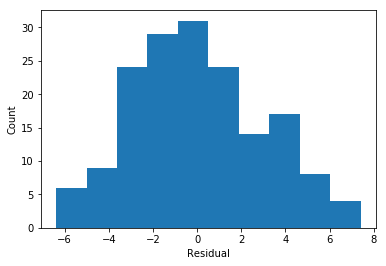

In [43]:
plt.hist(qbul['Residual'])
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

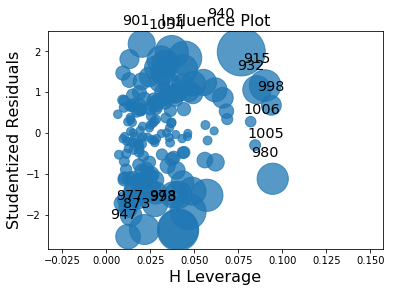

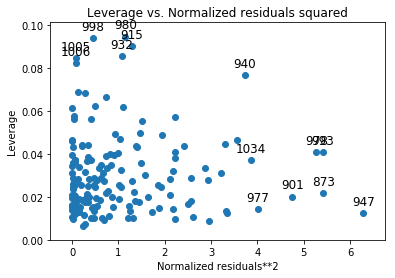

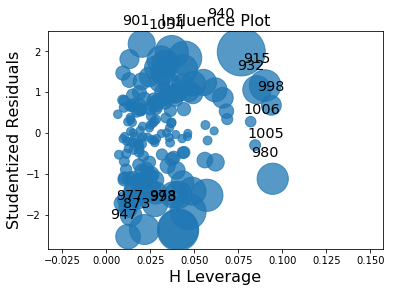

In [45]:
plot_leverage_resid2(QB3)
influence_plot(QB3)
#It doesn't look like there are any high residual, high leverage points left in the data

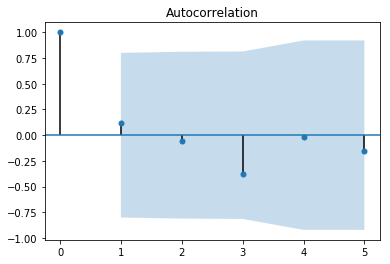

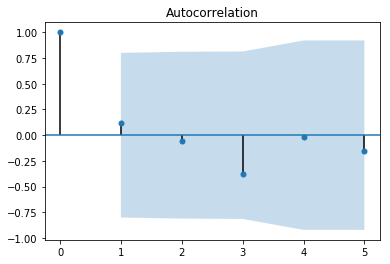

In [46]:
##Next we will double check for autocorrelation.  According to the Durbin Watson statistic, there is not a significant amount
#of auto correlation
qbsigcorr = qbul[['Overall Rating', 'Awareness', 'Play Action', 'Stamina', 'Throw Accuracy Mid', 'Throw on the Run']].corr()
plot_acf(qbsigcorr['Overall Rating'])
#There does not appear to be a significant amount of autocorrelation

In [48]:
#Finally, we move on to the Breusch Pagan test to check for heteroskedasticity
het_breuschpagan(qbul['Residual'], qbulsig)
#Based on the extremely low p-values, we can reject the null that there is heteroskedasticity present in the model

(65.46725212146482,
 2.051303190843791e-13,
 20.968744640881916,
 4.151792346207245e-16)

In [50]:
#Now that we have determined that we can use linear regression, let's run some tests and see how accuract our linear 
#regression model is
X_train, X_test, y_train, y_test = train_test_split(qbulsig, qbul['Overall Rating'], test_size = 0.3, random_state=42)
reg = LinearRegression()
reg.fit(X_train, y_train)
qbcv = cross_val_score(reg, qbulsig, qbul['Overall Rating'], cv=5)
qbcv_mean = np.mean(qbcv)
print(qbcv, qbcv_mean)
#It looks like on average, our model explains 72.04% of the variation in the data

[0.85437217 0.89645556 0.9367779  0.8263202  0.0879357 ] 0.7203723046732291


In [51]:
qbsig8 =  qb[['Overall Rating', 'Awareness', 'Play Action', 'Stamina', 'Throw Accuracy Mid', 'Throw on the Run']]

In [12]:
qbsig8.describe()

,Overall Rating,Awareness,Play Action,Stamina,Throw Accuracy Deep,Throw on the Run,4AVG Overall Rating
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,0.727428,0.676739,0.660180,0.499691,0.660074,0.556030,0.532945
std,0.173218,0.208629,0.194972,0.250238,0.195221,0.221524,0.260058
min,0.511877,0.443126,0.464408,0.183756,0.366560,0.305774,0.183756
25%,0.604343,0.526950,0.488108,0.404887,0.574608,0.457944,0.404613
50%,0.735628,0.651565,0.707935,0.464408,0.651565,0.483807,0.511877
75%,0.817903,0.794292,0.736353,0.519949,0.726588,0.593371,0.612877
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [52]:
qbsigstats=qbsig8.describe()

In [53]:
qbsigstats.to_csv('C:\\Users\\tilleymusprime\\Desktop\\qbsigstasts.csv')